<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression Review Lab

_Authors: Alexander Combs (NYC)_

---

In [168]:
import numpy as np
import pandas as pd
import random
import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### Create a Python dictionary 

- Use the following as the keys: 'X' and 'Y'
- Create two lists to use as the values in the dictionary: <br>
    for 'X': 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 <br>
    for 'Y': .5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9

In [111]:
# A:
aDict = {'X' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
         'Y' : [.5, .7, .8, .99, 1, 1.4, 1.8, 2.1, 2.4, 2.9]}

In [112]:
aDict['X'], aDict['Y']

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [0.5, 0.7, 0.8, 0.99, 1, 1.4, 1.8, 2.1, 2.4, 2.9])

### Using that dictionary, create a pandas DataFrame and call it pre_df

In [113]:
# A:
pre_df = pd.DataFrame(aDict)

In [115]:
pre_df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using the Series from the DataFrame, create two new series

- The first list should use the 'X' values and add 10 to each value
- The second list should use the 'Y' values and add 3 to each
- Add those new lists to a new DataFrame and save it as new_data (hint: zip())

Note: the original DataFrame should be unchanged (don't save to pre_df as new columns)

In [116]:
# A:
X = pre_df['X']
Y = pre_df['Y']

In [117]:
X_new = pd.Series([11,12,13,14,15,16,17,18,19,20])
Y_new = pd.Series([3.2,3.5,3.7])

In [118]:
X_new = X.append(X_new)
Y_new = Y.append(Y_new)

In [119]:
len(X_new), len(Y_new)

(20, 13)

In [120]:
new_data = pd.DataFrame(zip(X_new,Y_new), columns=['X','Y'])

In [122]:
len(new_data)

13

In [121]:
new_data

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Using pd.concat, vertically concat the new DataFrame, new_data, to the original pre_df DataFrame. Save it as df.

Hint: Be mindful of your column names, and make sure your index is 0-based and continuous.

In [123]:
# A:
df = pd.concat([pre_df, new_data], axis=0).reset_index().drop(columns='index')

In [125]:
len(df)

23

In [126]:
df

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00
5,6,1.40
6,7,1.80
7,8,2.10
8,9,2.40
9,10,2.90


### Plot the df DataFrame using pandas + matplotlib

- Set the figure size to 12 wide and 6 height
- Add a title, 'X vs Y' to the plot
- Set the size of the markers to 50 and the color of the markers to black

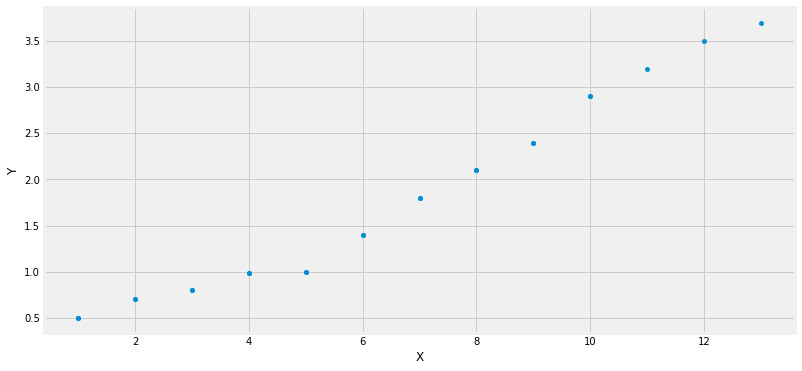

In [135]:
# A:
fig, axes = plt.subplots(figsize=(12,6))

df.plot(kind='scatter', x='X', y='Y', ax=axes);

### Using statsmodels, fit an OLS regression to your data and print our the summary

In [149]:
df.head()

,X,Y
0,1,0.50
1,2,0.70
2,3,0.80
3,4,0.99
4,5,1.00


https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [158]:
# A:
# Create X and y.
X = df.X.values.reshape(-1,1)
Y = df.Y.values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.intercept_)
print(linreg.coef_)

[-0.05084693]
[[0.27910602]]


## Using the model you fitted, answer the folowing questions:

### What is the R-squared for the model?

In [159]:
# A:
import sklearn.metrics as metrics
metrics.r2_score(X, Y)

-1.2986299560853198

### What is the p-value for your X?

In [163]:
# A:


### What is the intercept?

In [161]:
# A:
linreg.intercept_

array([-0.05084693])

### Using the above, write the equation for our model

### Solve the equation for an x of 20 then 21 (by hand/calculator)

In [166]:
# A:
linreg.predict([[20]])

array([[5.53127353]])

In [167]:
# A:
linreg.predict([[21]])

array([[5.81037955]])

### Using the predict functionality of statsmodels, predict the values for 20 and 21

Hint: You'll need to use a list - don't forget your intercept!

In [14]:
# A:

### Get the SSE by using the predictions for every X (y_hats) and the true y values

In [15]:
# A:

### Now plot your predictions for every X

- Plot the predictions as a line and the true y values using a scatterplot

In [16]:
# A:

### Import PolynomialFeatures from sklearn. Then do the following:

- Instantiate a PolynomialFeatures object and save it as poly
- Documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Use degree=5 (Hint: If that gives you more than 6 columns, you forgot to remove something)
- Use fit_transform on X to create a numpy array of polynomial features
- Save that array as poly_feats
- Convert this array to a DataFrame and save it as poly_X
- Join this new poly_df DataFrame with df['Y'] using pd.merge (Hint: join on the index)
- Save this joined index as pdf

In [17]:
# A:

In [18]:
# A:

In [19]:
# A:

### Using statsmodels as before, fit this new model and save it as poly_results

In [20]:
# A:

### Print out the model's predictions and save them as poly_yhat

In [21]:
# A:

### Calculate the SSE

In [22]:
# A:

### Now, create a for loop that does the follow:

- Iterates over the following alpha values [0, .001, .01, .25, .5, 1, 10]
- In each loop, you are going to fit a regularized regression
- See [Statsmodels Docs](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html) to understand how to do this
- In each loop, set the value of alpha to the value of being iterated over
- Set the L1_wt parameter to 0
- In each loop print out the alpha value, the SSE, and the mean absolute value of the coefficient of the model
- You should also print out the predictions as a line and the true y's as a scatterplot as above

In [23]:
# A:

### Using the output of the above, answer the following:
- What happens to the SSE over the increasing alpha values?
- What happens to the mean abs. value of the coefficients?
- Does increasing the bias to reduce variance always mean a better model?

In [24]:
# A:

In [25]:
# A:

In [26]:
# A: